In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime 
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('S&Pdata.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Aug 12, 2021","4,446.08","4,460.00","4,435.96","4,459.75","4,459.75","1,170,482,000"
1,"Aug 11, 2021","4,442.18","4,449.44","4,436.42","4,442.41","4,442.41","2,803,060,000"
2,"Aug 10, 2021","4,435.79","4,445.21","4,430.03","4,436.75","4,436.75","3,219,840,000"
3,"Aug 09, 2021","4,437.77","4,439.39","4,424.74","4,432.35","4,432.35","2,779,880,000"
4,"Aug 06, 2021","4,429.07","4,440.82","4,429.07","4,436.52","4,436.52","2,839,970,000"


In [4]:
df1 = pd.read_csv('S&Pdata.csv')
df1

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Aug 12, 2021","4,446.08","4,460.00","4,435.96","4,459.75","4,459.75","1,170,482,000"
1,"Aug 11, 2021","4,442.18","4,449.44","4,436.42","4,442.41","4,442.41","2,803,060,000"
2,"Aug 10, 2021","4,435.79","4,445.21","4,430.03","4,436.75","4,436.75","3,219,840,000"
3,"Aug 09, 2021","4,437.77","4,439.39","4,424.74","4,432.35","4,432.35","2,779,880,000"
4,"Aug 06, 2021","4,429.07","4,440.82","4,429.07","4,436.52","4,436.52","2,839,970,000"
...,...,...,...,...,...,...,...
248,"Aug 18, 2020","3,387.04","3,395.06","3,370.15","3,389.78","3,389.78","3,881,310,000"
249,"Aug 17, 2020","3,380.86","3,387.59","3,379.22","3,381.99","3,381.99","3,671,290,000"
250,"Aug 14, 2020","3,368.66","3,378.51","3,361.64","3,372.85","3,372.85","3,193,400,000"
251,"Aug 13, 2020","3,372.95","3,387.24","3,363.35","3,373.43","3,373.43","3,648,810,000"


In [5]:
df1["Date"] = pd.to_datetime(df1["Date"], format='%b %d, %Y' )

In [6]:
df1= df1.set_index("Date")
df1

,Open,High,Low,Close*,Adj Close**,Volume
Date,,,,,,
2021-08-12,"4,446.08","4,460.00","4,435.96","4,459.75","4,459.75","1,170,482,000"
2021-08-11,"4,442.18","4,449.44","4,436.42","4,442.41","4,442.41","2,803,060,000"
2021-08-10,"4,435.79","4,445.21","4,430.03","4,436.75","4,436.75","3,219,840,000"
2021-08-09,"4,437.77","4,439.39","4,424.74","4,432.35","4,432.35","2,779,880,000"
2021-08-06,"4,429.07","4,440.82","4,429.07","4,436.52","4,436.52","2,839,970,000"
...,...,...,...,...,...,...
2020-08-18,"3,387.04","3,395.06","3,370.15","3,389.78","3,389.78","3,881,310,000"
2020-08-17,"3,380.86","3,387.59","3,379.22","3,381.99","3,381.99","3,671,290,000"
2020-08-14,"3,368.66","3,378.51","3,361.64","3,372.85","3,372.85","3,193,400,000"


# Analysis of 2021 data

In [7]:
#selects the table from January-August 2021
this_year2 = df1['2021-08-12':'2021-01-04']
this_year2

,Open,High,Low,Close*,Adj Close**,Volume
Date,,,,,,
2021-08-12,"4,446.08","4,460.00","4,435.96","4,459.75","4,459.75","1,170,482,000"
2021-08-11,"4,442.18","4,449.44","4,436.42","4,442.41","4,442.41","2,803,060,000"
2021-08-10,"4,435.79","4,445.21","4,430.03","4,436.75","4,436.75","3,219,840,000"
2021-08-09,"4,437.77","4,439.39","4,424.74","4,432.35","4,432.35","2,779,880,000"
2021-08-06,"4,429.07","4,440.82","4,429.07","4,436.52","4,436.52","2,839,970,000"
...,...,...,...,...,...,...
2021-01-08,"3,815.05","3,826.69","3,783.60","3,824.68","3,824.68","4,764,180,000"
2021-01-07,"3,764.71","3,811.55","3,764.71","3,803.79","3,803.79","5,080,870,000"
2021-01-06,"3,712.20","3,783.04","3,705.34","3,748.14","3,748.14","6,049,970,000"


In [8]:
#flips the table to start from the latest date to the earliest
this_year2 = this_year2.iloc[::-1]

In [9]:
this_year2 = this_year2.reset_index()
this_year2

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,2021-01-04,"3,764.61","3,769.99","3,662.71","3,700.65","3,700.65","5,006,680,000"
1,2021-01-05,"3,698.02","3,737.83","3,695.07","3,726.86","3,726.86","4,582,620,000"
2,2021-01-06,"3,712.20","3,783.04","3,705.34","3,748.14","3,748.14","6,049,970,000"
3,2021-01-07,"3,764.71","3,811.55","3,764.71","3,803.79","3,803.79","5,080,870,000"
4,2021-01-08,"3,815.05","3,826.69","3,783.60","3,824.68","3,824.68","4,764,180,000"
...,...,...,...,...,...,...,...
149,2021-08-06,"4,429.07","4,440.82","4,429.07","4,436.52","4,436.52","2,839,970,000"
150,2021-08-09,"4,437.77","4,439.39","4,424.74","4,432.35","4,432.35","2,779,880,000"
151,2021-08-10,"4,435.79","4,445.21","4,430.03","4,436.75","4,436.75","3,219,840,000"
152,2021-08-11,"4,442.18","4,449.44","4,436.42","4,442.41","4,442.41","2,803,060,000"


In [10]:
#removes all commas
this_year2.replace(',','', regex=True, inplace=True)

In [11]:
#converts the Adj Close column from an object to a float
this_year2['Adj Close**'] = pd.to_numeric(this_year2['Adj Close**'], downcast="float")

In [12]:
this_year2 = this_year2.reset_index()

Text(0, 0.5, 'Adj_close')

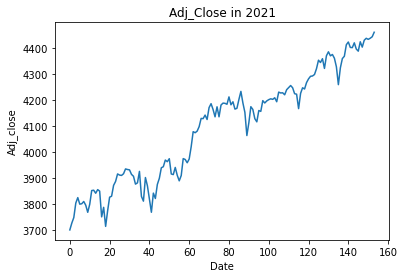

In [13]:
#plots the graph of Adj Close against the days
sns.lineplot(x= this_year2.index, y = this_year2['Adj Close**'], ci=None)
plt.title('Adj_Close in 2021')
plt.xlabel('Date')
plt.ylabel('Adj_close')

# Analysis of 2020 data

In [14]:
#reads in a new csv file which contains data from January-August 2020
last_year = pd.read_csv('SP2020.csv')
last_year

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Aug 12, 2020","3,355.46","3,387.89","3,355.46","3,380.35","3,380.35","3,768,560,000"
1,"Aug 11, 2020","3,370.34","3,381.01","3,326.44","3,333.69","3,333.69","5,087,650,000"
2,"Aug 10, 2020","3,356.04","3,363.29","3,335.44","3,360.47","3,360.47","4,318,570,000"
3,"Aug 07, 2020","3,340.05","3,352.54","3,328.72","3,351.28","3,351.28","4,104,860,000"
4,"Aug 06, 2020","3,323.17","3,351.03","3,318.14","3,349.16","3,349.16","4,267,490,000"
...,...,...,...,...,...,...,...
149,"Jan 09, 2020","3,266.03","3,275.58","3,263.67","3,274.70","3,274.70","3,638,390,000"
150,"Jan 08, 2020","3,238.59","3,267.07","3,236.67","3,253.05","3,253.05","3,720,890,000"
151,"Jan 07, 2020","3,241.86","3,244.91","3,232.43","3,237.18","3,237.18","3,420,380,000"
152,"Jan 06, 2020","3,217.55","3,246.84","3,214.64","3,246.28","3,246.28","3,674,070,000"


In [15]:
last_year["Date"] = pd.to_datetime(last_year["Date"], format='%b %d, %Y' )

In [16]:
last_year= last_year.set_index("Date")

In [17]:
last_year = last_year.iloc[::-1]

In [18]:
last_year = last_year.reset_index()

In [19]:
last_year.replace(',','', regex=True, inplace=True)

In [20]:
last_year['Adj Close**'] = pd.to_numeric(last_year['Adj Close**'], downcast="float")

In [21]:
last_year = last_year.reset_index()

In [22]:
last_year

,index,Date,Open,High,Low,Close*,Adj Close**,Volume
0,0,2020-01-03,3226.36,3246.15,3222.34,3234.85,3234.850098,3461290000
1,1,2020-01-06,3217.55,3246.84,3214.64,3246.28,3246.280029,3674070000
2,2,2020-01-07,3241.86,3244.91,3232.43,3237.18,3237.179932,3420380000
3,3,2020-01-08,3238.59,3267.07,3236.67,3253.05,3253.050049,3720890000
4,4,2020-01-09,3266.03,3275.58,3263.67,3274.70,3274.699951,3638390000
...,...,...,...,...,...,...,...,...
149,149,2020-08-06,3323.17,3351.03,3318.14,3349.16,3349.159912,4267490000
150,150,2020-08-07,3340.05,3352.54,3328.72,3351.28,3351.280029,4104860000
151,151,2020-08-10,3356.04,3363.29,3335.44,3360.47,3360.469971,4318570000
152,152,2020-08-11,3370.34,3381.01,3326.44,3333.69,3333.689941,5087650000


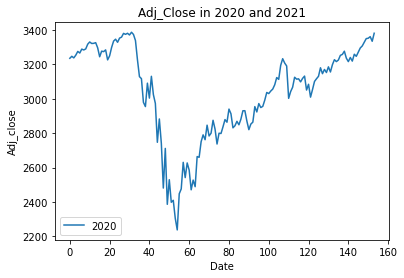

In [23]:
sns.lineplot(x= last_year.index, y = last_year['Adj Close**'], ci=None, label='2020')
plt.title('Adj_Close in 2020 and 2021')
plt.xlabel('Date')
plt.ylabel('Adj_close')
plt.legend()

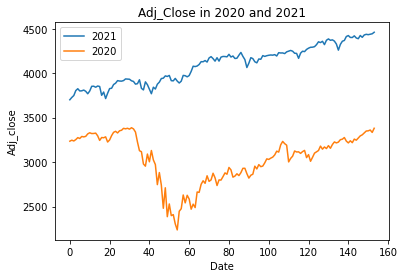

In [24]:
#combines the graphs of both 2020 and 2021
sns.lineplot(x= this_year2.index, y = this_year2['Adj Close**'], ci=None, label='2021')
sns.lineplot(x= last_year.index, y = last_year['Adj Close**'], ci=None, label='2020')
plt.title('Adj_Close in 2020 and 2021')
plt.xlabel('Date')
plt.ylabel('Adj_close')
plt.legend()

Plot a residual plot to decide whether a linear model is appropriate for the data. If the data is randomly spread out, then a linear model is appropriate

C:\Users\Greatness\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


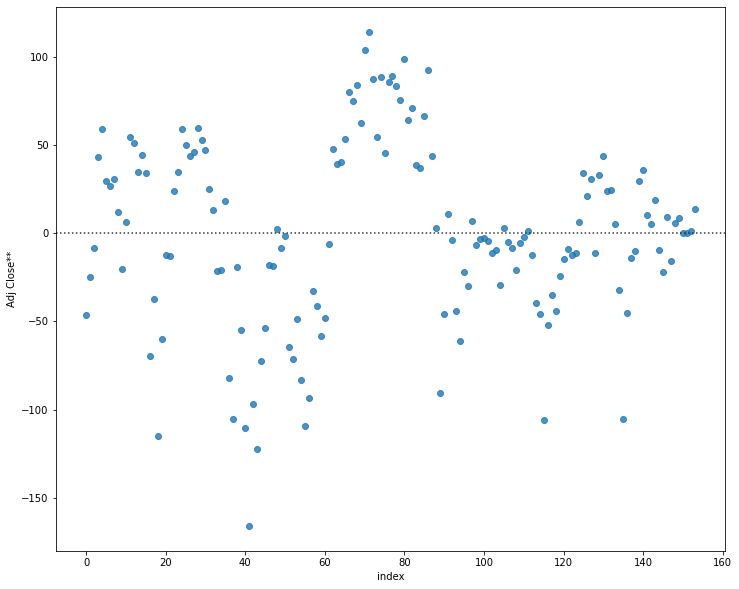

In [25]:
#residual plot for the year 2021
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(this_year2['index'], this_year2['Adj Close**'])
plt.show()

In [26]:
lm = LinearRegression()
lm

LinearRegression()

In [27]:
X = this_year2[["index"]]
Y = this_year2['Adj Close**']

In [28]:
lm.fit(X,Y)

LinearRegression()

In [29]:
Yhat=lm.predict(X)
Yhat[0:5]

array([3747.12505474, 3751.69233618, 3756.25961763, 3760.82689907,
       3765.39418052])

In [30]:
lm.intercept_

3747.125054739867

In [31]:
lm.coef_

array([4.56728144])

Yhat = a+bX

Formula for the year 2021:

Adjclose = 3747.13 + 4.57 * index

(0.0, 4497.705004882812)

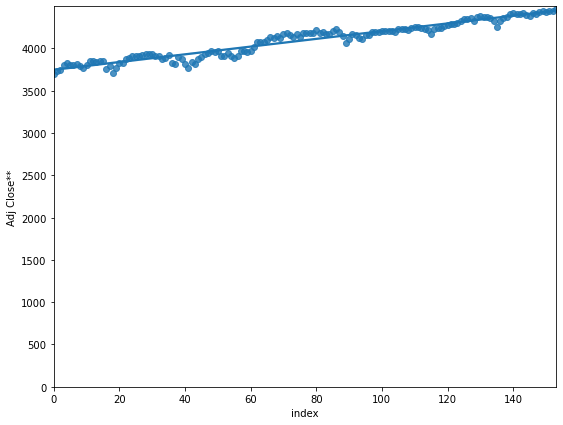

In [32]:
#regression plot for the year 2021
width = 9
height = 7
plt.figure(figsize=(width, height))
sns.regplot(x="index", y="Adj Close**", data=this_year2)
plt.ylim(0,)

(0.0, 3443.58740234375)

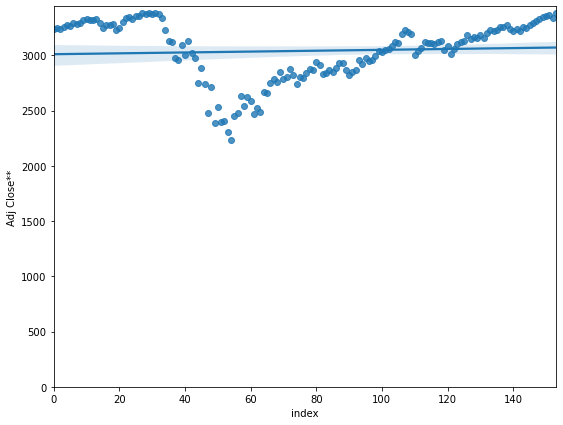

In [33]:
#regression plot for the year 2020
width = 9
height = 7
plt.figure(figsize=(width, height))
sns.regplot(x="index", y="Adj Close**", data=last_year)
plt.ylim(0,)

C:\Users\Greatness\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


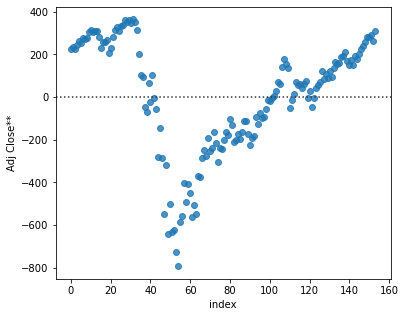

In [34]:
#residual plot for the year 2020
width = 6
height = 5
plt.figure(figsize=(width, height))
sns.residplot(last_year['index'], last_year['Adj Close**'])
plt.show()

This data is definitely not spread out randomly and is therefore not appropriate for a linear model. A polynomial model might work.

# Polynomial regression for the year 2020

In [35]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Adj Close')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Adj Close')

    plt.show()
    plt.close()

In [36]:
m = last_year["index"]
n = last_year['Adj Close**']

In [37]:
#quadratic function to the 2nd order
f = np.polyfit(m, n, 2)
p = np.poly1d(f)
print(p)

        2
0.1127 x - 16.85 x + 3447


In [38]:
#quadratic function to the 3rd order
f = np.polyfit(m, n, 3) 
p = np.poly1d(f)
print(p)

            3          2
-0.0006978 x + 0.2728 x - 26.62 x + 3569


In [39]:
#quadratic function to the 4th order
f = np.polyfit(m, n, 4)
p = np.poly1d(f)
print(p)

          4            3          2
-2.9e-05 x + 0.008177 x - 0.5982 x + 2.773 x + 3351


In [40]:
#quadratic function to the 5th order
f = np.polyfit(m, n, 5)
p = np.poly1d(f)
print(p)

           5            4           3         2
9.622e-07 x - 0.000397 x + 0.05815 x - 3.452 x + 64.34 x + 3051


In [41]:
#quadratic function to the 6th order
f = np.polyfit(m, n, 6)
p = np.poly1d(f)
print(p)

            6             5             4           3         2
-4.055e-10 x + 1.148e-06 x - 0.0004294 x + 0.06078 x - 3.551 x + 65.83 x + 3046


After inputing values into the equation, I decided that polynomial eqaution to the 6th order was the best fit for the 2020 model

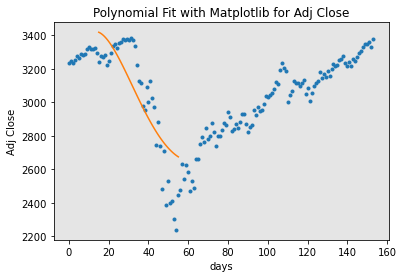

In [42]:
PlotPolly(p, m, n, 'days')